# Extracting Industries from AboutC Column

In [1]:
# en_core_web_lg

import spacy
from spacy import displacy
from spacy.matcher import Matcher



def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    # append mock entity for match in displaCy style to matched_sents
    # get the match span by ofsetting the start and end of the span with the
    # start and end of the sentence in the doc
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })
    
    

In [2]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd
import re
pd.options.mode.chained_assignment = None  # default='warn'

df_ori = pd.read_csv('../data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['jobpost','Title'])
print(df.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(df_ori.shape[0]-df.shape[0]))

(19001, 24)
(18892, 24)
Removed 109 duplicates (based on jobpost + Title)


In [3]:
df['AboutC'].head()

0                                                  NaN
1    The International Research & Exchanges Board (...
2    The Caucasus Environmental NGO Network is a\nn...
3                                                  NaN
4                                                  NaN
Name: AboutC, dtype: object

In [4]:
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

pattern = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
matcher.add('provider of', collect_sents, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
matcher.add('provider of', collect_sents, pattern)  # add pattern
pattern = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern
pattern = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern

text = """""Kamurj" UCO CJSC is providing micro and small loans to
low-income families in urban and rural areas throughout Armenia. More
information about "Kamurj" UCO CJSC is available at: www.kamurj.am."""
text = re.sub(r'\s+', ' ', text)

doc = nlp(text)
# for token in doc:
#     print("{0}/{1} <--{2}-- {3}/{4}".format(
#         token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
matches = matcher(doc)
displacy.render(matched_sents, style='ent', manual=True, jupyter=True)

In [6]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
      token.shape_, token.is_alpha, token.is_stop)

" " PUNCT `` punct " False False
" " PUNCT `` punct " False False
Kamurj kamurj PROPN NNP dep Xxxxx True False
" " PUNCT '' punct " False False
UCO uco PROPN NNP compound XXX True False
CJSC cjsc PROPN NNP nsubj XXXX True False
is be VERB VBZ aux xx True True
providing provide VERB VBG ROOT xxxx True False
micro micro ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True
small small ADJ JJ conj xxxx True False
loans loan NOUN NNS dobj xxxx True False
to to ADP IN prep xx True True
low low ADJ JJ amod xxx True False
- - PUNCT HYPH punct - False False
income income NOUN NN compound xxxx True False
families family NOUN NNS pobj xxxx True False
in in ADP IN prep xx True True
urban urban ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True
rural rural ADJ JJ conj xxxx True False
areas area NOUN NNS pobj xxxx True False
throughout throughout ADP IN prep xxxx True True
Armenia armenia PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False
More more ADJ JJR amod Xxxx 

## Iterate Through All

In [80]:
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

pattern = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
matcher.add('provider of', None, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
matcher.add('provider of', None, pattern)  # add pattern
# pattern = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern
# pattern = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern
# pattern = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern
# pattern = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern

#print(df.AboutC.head())
#text = df.AboutC[2]
for text in df.AboutC:
    #print(text)
    if pd.notnull(text) and text != 'NaN':
        text = re.sub(r'\s+', ' ', text)
        doc = nlp(text)
        matches = matcher(doc)
        token_set = set()
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # get string representation
            span = doc[start:end]  # the matched span
            #print(match_id, string_id, start, end, span.text)
            #row_tokens.append(span.text)
            token_set.add(span.text)
        if token_set:    
            matched_sents.append(token_set)
        
print(matched_sents)

[{'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization', 'microfinance services'}, {'consulting services'}, {'non-profit organization', 'profit organization', 'microfinance services'}, {'Company is mortgage company', 'mortgage company'}, {'trading company'}, {'software company'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization', 'microfinance services'}, {'software company'}, {'software company'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization', 'microfinance services'}, {'training company'}, {'non-profit organization', 'profit organization'}, {'training company'}, {'software com

In [81]:
# from collections import Counter

# word_freq = Counter(matched_sents)
# common_words = word_freq.most_common()
matched_sents
flat_list = []
for row in matched_sents:
    for token in row:
        flat_list.append(token)

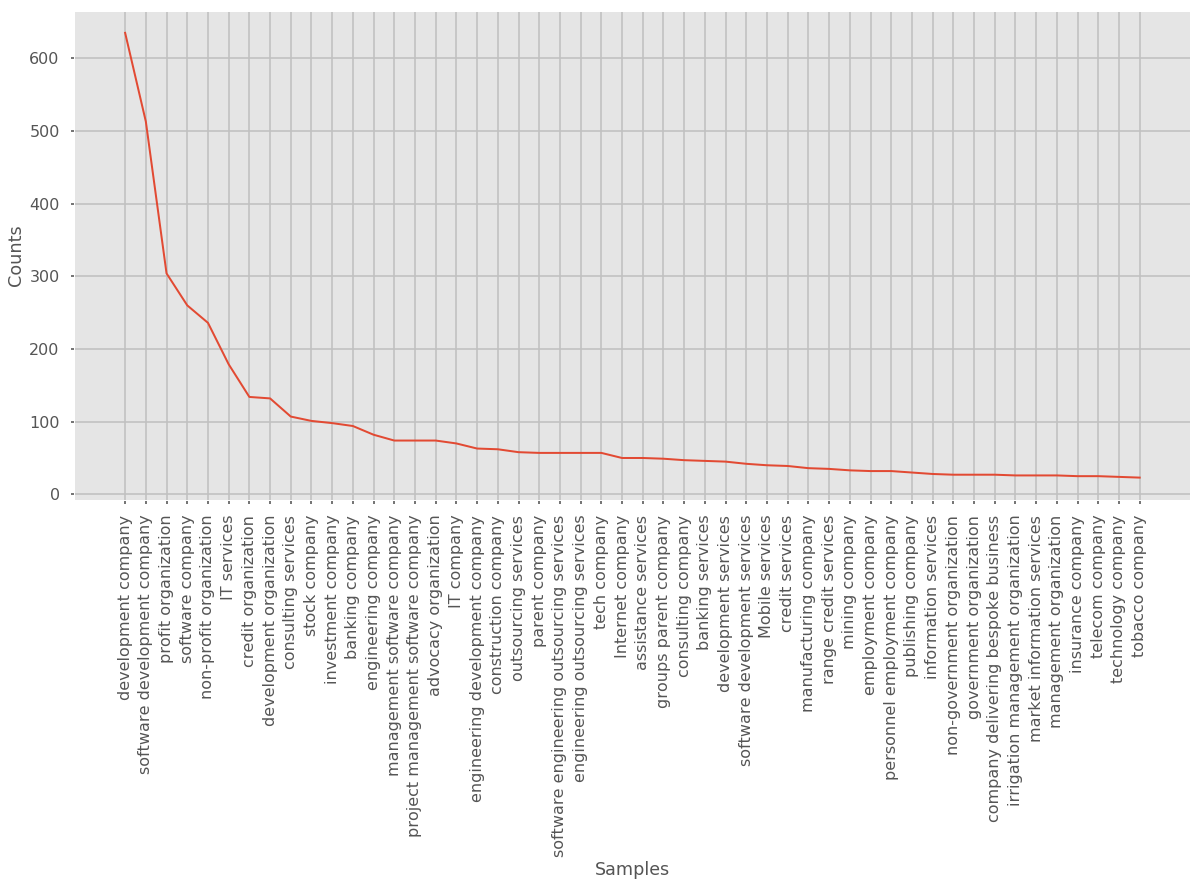

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)

In [83]:
# Remove terms that are not useful in this context
flat_list = [i for i in flat_list if not ('development company' in i)]
flat_list = [i for i in flat_list if not ('profit organization' in i)]
flat_list = [i for i in flat_list if not ('development organization' in i)]
flat_list = [i for i in flat_list if not ('parent company' in i)]

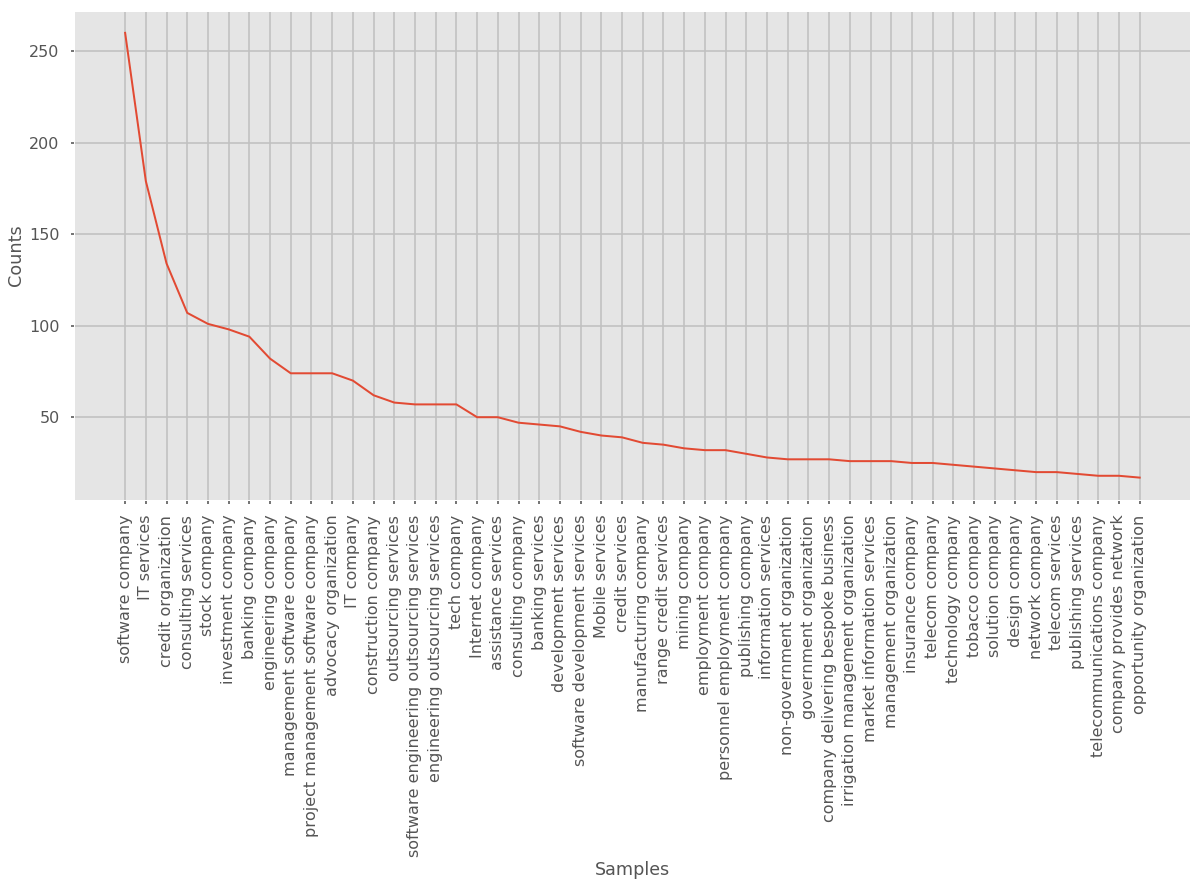

In [84]:
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)

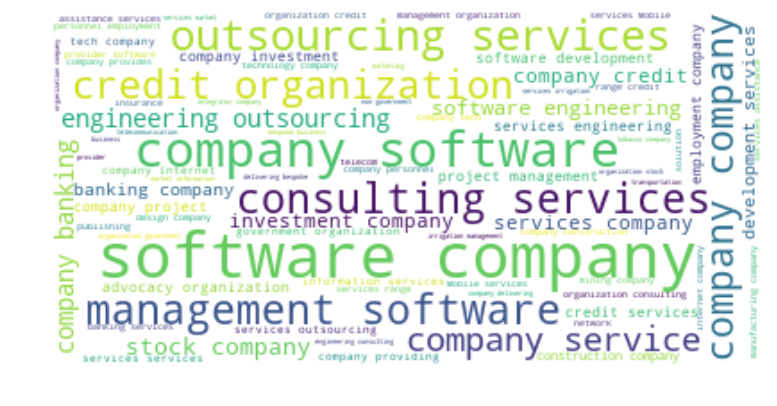

In [85]:
text_clean = " ".join(flat_list)
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wc = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
print(matched_sents)

[{'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization', 'microfinance services'}, {'consulting services'}, {'non-profit organization', 'profit organization', 'microfinance services'}, {'Company is mortgage company', 'mortgage company'}, {'trading company'}, {'software company'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization', 'microfinance services'}, {'software company'}, {'software company'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization'}, {'non-profit organization', 'profit organization', 'microfinance services'}, {'training company'}, {'non-profit organization', 'profit organization'}, {'training company'}, {'software com

In [92]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    #wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(['armenian','armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
                 'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company', 'development_company','profit_organization', 'development_organization','parent_company', 'NaN'  ])
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    #tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    #tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_nostop

new_match = []
import numpy as np
for row in matched_sents:
    rowset = set()
    for token in row:
        token = token.replace(' ', "_")
        rowset.add(token)
    new_match.append(rowset)

newlist = []
for aset in new_match:
    newlist.append(' '.join(aset))

df_ms = pd.DataFrame(newlist)
df_ms.columns = {'tokens'}
df_ms['tokens'] = df_ms.tokens.map(word_tokenize)
df_ms['tokens'] = df_ms.tokens.apply(preprocess)
df_ms['tokens'] = df_ms.tokens.apply(lambda x: ' '.join(x))

df_ms['tokens']

0                                 non-profit_organization
1                                 non-profit_organization
2                                 non-profit_organization
3                                 non-profit_organization
4           microfinance_services non-profit_organization
5                                     consulting_services
6           microfinance_services non-profit_organization
7            mortgage_company company_is_mortgage_company
8                                         trading_company
9                                        software_company
10                                non-profit_organization
11                                non-profit_organization
12          microfinance_services non-profit_organization
13                                       software_company
14                                       software_company
15                                non-profit_organization
16                                non-profit_organization
17          mi

In [95]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# refactor it to a function
def clusterdf(new_match, num):
#     vec_tf = CountVectorizer()
#     grain_tf = vec_tf.fit_transform(new_match)
    vec_tf = CountVectorizer(min_df=2)
    grain_tf = vec_tf.fit_transform(new_match)
    vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=4, use_idf=True)
    grain_tfidf = vec_tfidf.fit_transform(new_match)
    # Use SVD to reduce dimensions
    svd = TruncatedSVD(100)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    X_lsa = lsa.fit_transform(grain_tfidf)
    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))
    #print_terms(km3, num)
    
    original_space_centroids = svd.inverse_transform(km3.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()
        
    plt.hist(km3.labels_, bins=num)
    plt.title('Cluster Frequencies')
    plt.show()

Explained variance of the SVD step: 94%
CPU times: user 51.5 ms, sys: 2.65 ms, total: 54.1 ms
Wall time: 12.9 ms
Clusters: 5
Silhouette Coefficient for clusters: 0.210
Cluster 0: training_organization assistance_organization travel_company daughter_organization company_providing_services information_technology_company product_company tourism_company company_has_offices lending_organization
Cluster 1: software_development_company company_providing_services travel_company outsourcing_services software_technology_company distributor_company core_services bookmaker_company care_services health_care_services
Cluster 2: engineering_development_company production_company software_services provider_with_development_centers management_company distributor_company engineering_services information_technology_company services_organization tourism_company
Cluster 3: software_company it_services software_development_company integrator_company provider_of_software system_integrator_company management_

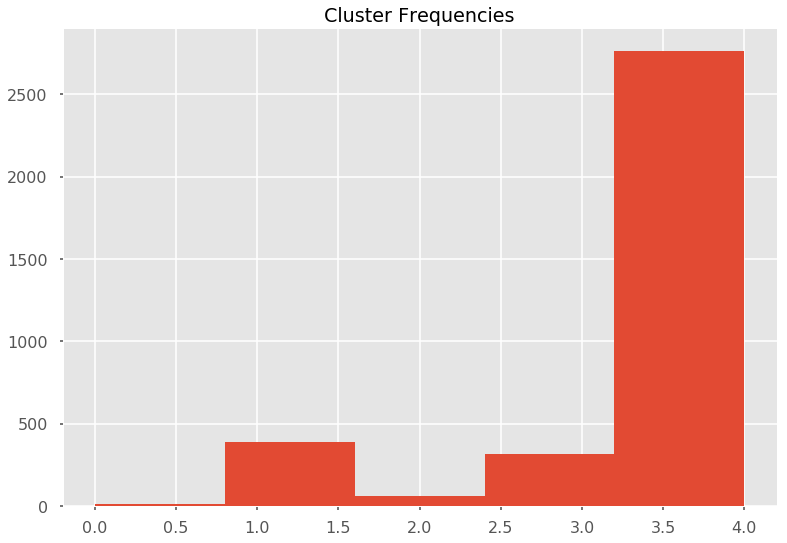

In [96]:
clusterdf(df_ms['tokens'], 5)


## Try topic modelling 

In [97]:
import logging
import gensim
from gensim import corpora

df_ms['realtokens'] = df_ms.tokens.map(word_tokenize)

#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
dictionary = corpora.Dictionary(df_ms['realtokens'])
print(dictionary)
dictionary.filter_extremes(no_below=3, no_above=0.7)
print(dictionary)

Dictionary(467 unique tokens: ['non-profit_organization', 'microfinance_services', 'consulting_services', 'company_is_mortgage_company', 'mortgage_company']...)
Dictionary(217 unique tokens: ['non-profit_organization', 'microfinance_services', 'consulting_services', 'trading_company', 'software_company']...)


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/gensim/models/ldamodel.py:138: RuntimeWarning: invalid value encountered in greater
  if all(rho * dprior + prior > 0):


[]
[]
[]
[]
[]


ValueError: max() arg is an empty sequence

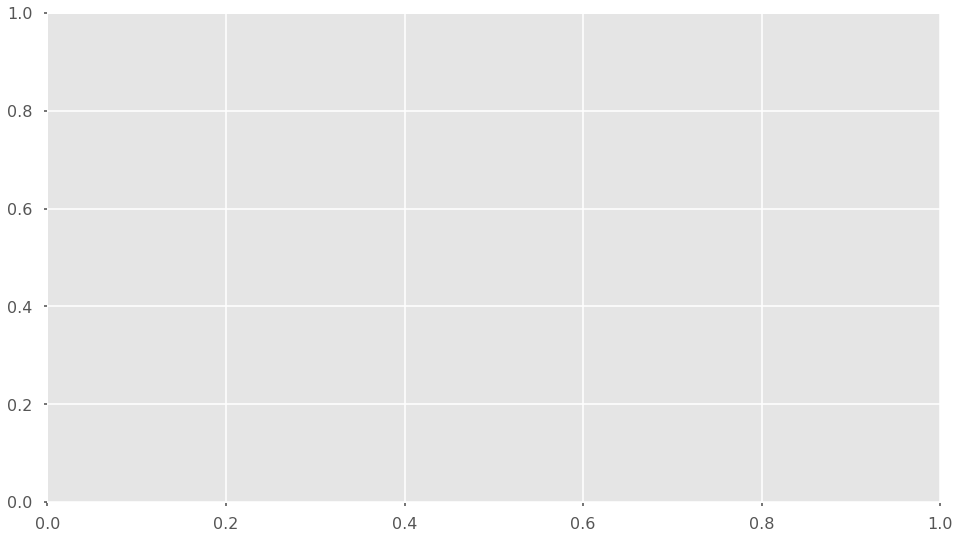

In [98]:


topic_num = 3

# Use the dictionary to prepare a DTM (using TF)
dtm_train = [dictionary.doc2bow(d) for d in df_ms['realtokens']]
lda = gensim.models.ldamodel.LdaModel(dtm_train, num_topics=topic_num, alpha='auto', chunksize=30, id2word=dictionary,
                                      passes=20, random_state=432)
lda.show_topics()
lda.show_topics(num_words=20)

dtopics_train = lda.get_document_topics(dtm_train)
# print topic distribution for 1st 5 rows
for i in range(0, 5):
    print(dtopics_train[i])

# get and plot the distribution of the topics
from operator import itemgetter
import matplotlib.style as style
style.use('ggplot')
style.use('seaborn-poster')
fig, ax = plt.subplots(figsize=(16, 9))
top_train = [max(t, key=itemgetter(1))[0] for t in dtopics_train]
plt.hist(top_train, bins=topic_num-1)
plt.title('Topic Frequencies')
plt.show()

In [ ]:
lda.show_topics()

Not very distinctive...

In [51]:
def cleanup(token, lower = True):
    if lower:
       token = token.lower()
    return token.strip()

labels = set([w.label_ for w in doc.ents]) 
for label in labels: 
    entities = [cleanup(e.string, lower=False) for e in doc.ents if label==e.label_] 
    entities = list(set(entities)) 
    print (label,entities)

LOC ['Newtown']
GPE ['Germany', 'Hungary', 'Russia', 'the United States', 'Netherlands', 'UK', 'Singapore', 'Poland', 'Belarus', 'Canada', 'Armenia', 'Sweden', 'Kazakhstan', 'Switzerland', 'Ukraine']
ORG ['EPAM Systems, Inc.', 'PA', 'NYSE', 'the USA', 'EPAM']
